In [2]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
class bandit:
    def __init__(self, arms, episodes):
        
        
        # initialise the class with the number of arms and episodes to run the simulation
        self.arms = arms
        self.episodes = episodes
        
        # make action space that is equivalent to the number of arms
        self.actions = [x for x in range(arms)]
    
    
    def get_success_rate(self):
        
        
        # chose randomly a probability of success for each arm
        return [np.random.random() for i in range(self.arms)]
        
    
    
    def play(self, rates, epsilon):
        
        
        # create empty list to store each action and reward received at each play
        self.N = []
        
        # create the Q dictionary to store the value of each action
        self.Q = defaultdict(lambda:0)
        
        # create an empty list to store the sum of rewards of every action taken at a particular time
        self.plot_val = []
        
        # set the learning rate
        self.epsilon = epsilon
        
       
        
        # loop through each episode
        for i in range(1, self.episodes+1):
            probs = self.update_policy(self.Q, self.epsilon, len(self.actions))
            action = np.random.choice(self.actions, p = probs)
            reward = np.random.normal(rates[action], 0.1)
            self.N.append([action,reward])
            Q = self.get_q(action, self.N, self.Q)
            self.plot_val.append((sum([Q[x] for x in (self.Q.keys())])))
        
        
        
        return self.Q, self.plot_val, self.N
    
        
    def get_q(self, a, n, q):
        
        
        # set k (the number of occurence of action a) to zero
        # keep track of each reward received at every instance the action was taken
        
        k, r = 0, 0
        
        # loop through all the actions and rewards from N
        for i in n:
            if i[0] == a:
                k =+ 1
                r =+ i[1]
        
        # update the action value with the average reward received until that particular visit
        q[a] = r/k    
        
        return q
    
    
    
    def update_policy(self, q, e, n_actions):
        
        # chose a number randomly between 0 and 1
        b = np.random.random()
        
        # check if the number is greater than 1-espilon or the total sum of rewards is zero, you explore
        # if epsilon is a small number, it is more likely to explore
        # else, you act greedly and chose best action
        if q == {} or b > 1-e:
            policy = np.ones(n_actions) * (1/n_actions)
        else:
            best_a = max(zip(q.values(), q.keys()))[1]
            policy = np.zeros(n_actions)
            policy[best_a] = 1 
    
    
    
        return policy

In [4]:
game = bandit(10,1000)
success_rates  = game.get_success_rate()
print(success_rates)

data1, plot1, N1 = game.play(success_rates, 0.1)
data2, plot2, N2 = game.play(success_rates, 0.01)
data3, plot3, N3 = game.play(success_rates, 0)


[0.45020246728179003, 0.5478640906597774, 0.9099421399105757, 0.18492389951361454, 0.7104119250082338, 0.5935684748375457, 0.367268870563513, 0.11827716280752232, 0.7298599472774393, 0.7651752122302614]


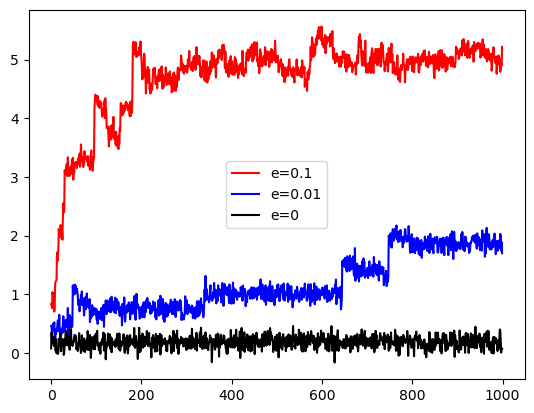

In [5]:
x = [i for i in range(game.episodes)]
N1, N2, N3 = np.array(N1), np.array(N2), np.array(N3)

plt.plot(x,plot1, color ='r', label = 'e=0.1')
plt.plot(x,plot2, color ='b', label = 'e=0.01')
plt.plot(x,plot3, color = 'black', label = 'e=0')

plt.legend()

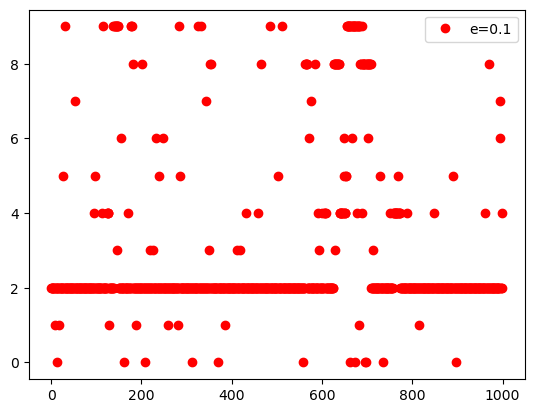

In [6]:
plt.plot(x,N1[:,0],"o", color ='r', label = 'e=0.1')
plt.legend()

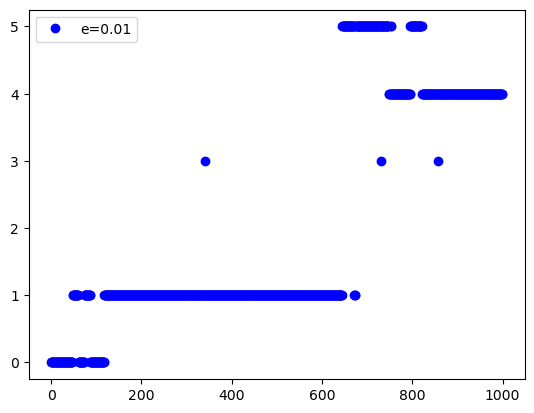

In [7]:
plt.plot(x,N2[:,0], 'o', color ='b', label = 'e=0.01')
plt.legend()

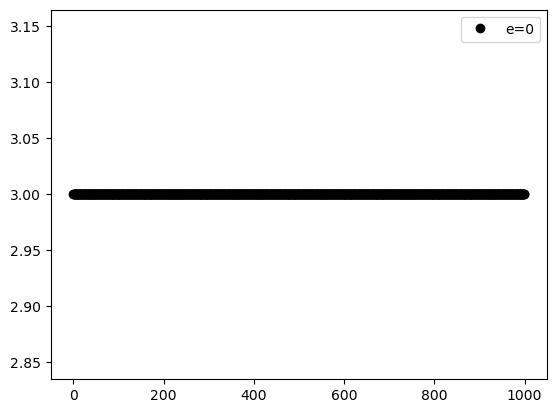

In [9]:
plt.plot(x,N3[:,0],'o', color = 'black', label = 'e=0')
plt.legend()

In [10]:
reward1, reward2, reward3 = np.zeros(game.episodes), np.zeros(game.episodes), np.zeros(game.episodes)


for i in range(game.episodes):
    data1, plot1, N1 = game.play(success_rates, 0.1)
    data2, plot2, N2 = game.play(success_rates, 0.01)
    data3, plot3, N3 = game.play(success_rates, 0)
    
    reward1 = reward1 + plot1
    reward2 = reward2 + plot2
    reward3 = reward3 + plot3

reward1, reward2, reward3 = reward1/game.episodes, reward2/game.episodes, reward3/game.episodes

AttributeError: 'bandit' object has no attribute 'episode'

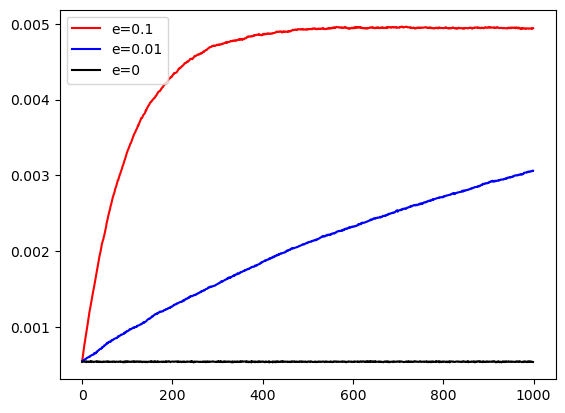

In [13]:
reward1, reward2, reward3 = reward1/game.episodes, reward2/game.episodes, reward3/game.episodes

plt.plot(x,reward1, color ='r', label = 'e=0.1')
plt.plot(x,reward2, color ='b', label = 'e=0.01')
plt.plot(x,reward3, color = 'black', label = 'e=0')

plt.legend()